# PLANTILLA MODELIZACIÓN PARA NO SUPERVISADO

**IMPORTANTE**: Recuerda hacer una copia de esta plantilla para no machacar la original.

**IMPORTANTE**: Esta plantilla está diseñada para una visión de máximos utilizando el framework de The Ultimate Algo Machine. Si tienes problemas de memoria o rendimiento recuerda reducir el problema mediante:

* Muestreo
* Balanceo undersampling
* Reducir el número de k a testar
* Reducir el número de repeticiones de n_init

## IMPORTAR PAQUETES

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

from sklearn.model_selection import GridSearchCV

#Autocompletar rápido
%config IPCompleter.greedy=True

#Desactivar la notación científica
pd.options.display.float_format = '{:.2f}'.format

#Desactivar los warnings
import warnings
warnings.filterwarnings("ignore")

## IMPORTAR LOS DATOS

Sustituir la ruta del proyecto.

In [18]:
ruta_proyecto = 'C:/Users/esteb/Escritorio/carpeta/Estudios/DS4B/03_MACHINE_LEARNING/08_CASOS/01_LEADSCORING'

Nombres de los ficheros de datos.

In [19]:
nombre_df = 'df_tablon.pickle'

Cargar los datos.

In [20]:
df = pd.read_pickle(ruta_proyecto + '/02_Datos/03_Trabajo/' + nombre_df)

In [21]:
df

,origen_API,origen_Landing Page Submission,origen_Lead Add Form,origen_OTROS,fuente_Chat,fuente_Direct Traffic,fuente_Google,fuente_OTROS,fuente_Organic Search,fuente_Reference,...,ocupacion_Unemployed,ocupacion_Working Professional,descarga_lm_No,descarga_lm_Yes,visitas_total_mms,tiempo_en_site_total_mms,paginas_vistas_visita_mms,score_actividad_mms,score_perfil_mms,compra
id,,,,,,,,,,,,,,,,,,,,,
660737,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.73,0.44,0
660727,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,0.05,0.67,0.10,0.64,1.00,1
660719,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.02,0.13,0.05,0.55,0.67,0
660680,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.91,0.44,0
660664,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.73,0.44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579697,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,...,1.00,0.00,1.00,0.00,0.19,0.45,0.20,0.73,1.00,1
579642,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.05,0.78,0.10,0.64,1.00,0
579546,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,1.00,0.00,0.00,1.00,0.05,0.10,0.10,0.64,0.89,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4857 entries, 660737 to 579533
Data columns (total 43 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   origen_API                                4857 non-null   float64
 1   origen_Landing Page Submission            4857 non-null   float64
 2   origen_Lead Add Form                      4857 non-null   float64
 3   origen_OTROS                              4857 non-null   float64
 4   fuente_Chat                               4857 non-null   float64
 5   fuente_Direct Traffic                     4857 non-null   float64
 6   fuente_Google                             4857 non-null   float64
 7   fuente_OTROS                              4857 non-null   float64
 8   fuente_Organic Search                     4857 non-null   float64
 9   fuente_Reference                          4857 non-null   float64
 10  ult_actividad_Chat Conversati

In [23]:
df.drop(columns = ['fuente_Chat',
                  'fuente_Direct Traffic',
                  'fuente_Google',
                  'fuente_OTROS',
                  'fuente_Organic Search',
                  'fuente_Reference',
                  'score_actividad_mms',
                  'score_perfil_mms',
                  'ambito_Banking, Investment And Insurance',
                  'ambito_Business Administration',
                  'ambito_Finance Management',
                  'ambito_Human Resource Management',
                  'ambito_IT Projects Management',
                  'ambito_International Business',
                  'ambito_Marketing Management',
                  'ambito_Media and Advertising',
                  'ambito_OTROS',
                  'ambito_Operations Management',
                  'ambito_Select',
                  'ambito_Supply Chain Management',
                  'ambito_Travel and Tourism',
                  'descarga_lm_No',
                  'descarga_lm_Yes',
                  'visitas_total_mms'], inplace = True)

## MODELIZAR

### Crear el espacio de soluciones

In [25]:
min_k = 3
max_k = 7

soluciones = list(range(min_k,max_k))

### Crear listas para guardar la salida de cada métrica

In [26]:
codo = []
silueta = []
calins = []
davies = []

### Analizar el espacio de soluciones

In [27]:
for solucion in soluciones:
    
    #Instanciar
    cluster = KMeans(n_clusters = solucion, n_init=10)
    
    #Entrenar
    cluster.fit(df)
    
    #Recoger las métricas
    codo.append(cluster.inertia_)
    silueta.append(silhouette_score(df, cluster.labels_))
    calins.append(calinski_harabasz_score(df, cluster.labels_))
    davies.append(davies_bouldin_score(df, cluster.labels_))

### Identificar la mejor solucion

#### Analizar las métricas

In [28]:
metricas = pd.DataFrame({'Solucion':soluciones,
              'Codo': codo,
              'Silueta':silueta,
              'Calins':calins,           
              'Davies':davies}).set_index('Solucion')

metricas

,Codo,Silueta,Calins,Davies
Solucion,,,,
3,5393.30,0.28,1398.39,1.52
4,4722.99,0.31,1293.94,1.40
5,4331.69,0.31,1167.48,1.41
6,3780.14,0.37,1211.60,1.51


#### Analizar los gráficos

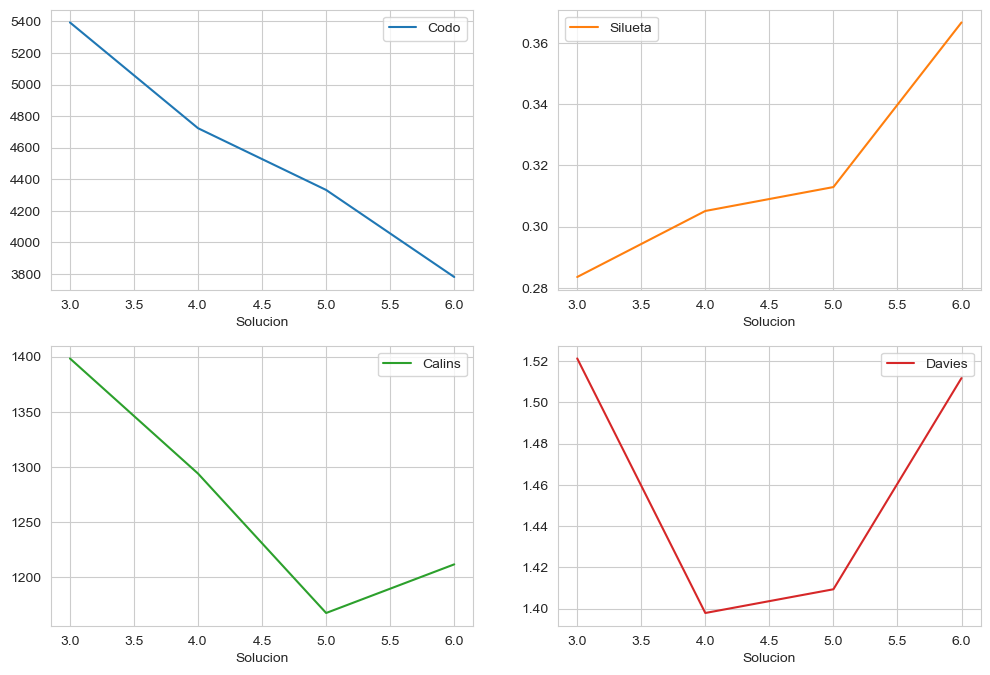

In [29]:
metricas.plot(subplots = True, figsize = (12,8), layout = (2,2), sharex = False);

### Segmentación final con la mejor solucion

In [33]:
mejor_solucion = 6

#Instanciar
cluster = KMeans(n_clusters = mejor_solucion, n_init=10)
    
#Entrenar
cluster.fit(df)

KMeans(n_clusters=6, n_init=10)

## EVALUAR

## PERFILAR LOS SEGMENTOS

Comprobar que los perfiles obtenidos en entrenamiento son similares a los objetidos al predecir sobre validación.

### Calcular el segmento en entrenamiento y en validación

In [34]:
df['segmento'] = cluster.predict(df)

### Comparar los perfiles

In [35]:
df.groupby('segmento').mean().T \
    .style.highlight_max(color = 'lightgreen', axis = 1) \
    .highlight_min(color = 'red', axis = 1)

segmento,0,1,2,3,4,5
origen_API,1.000000,0.190436,0.000000,0.000000,1.000000,0.217002
origen_Landing Page Submission,0.000000,0.772651,0.955324,0.913529,0.000000,0.577181
origen_Lead Add Form,0.000000,0.028523,0.037230,0.072524,0.000000,0.201342
origen_OTROS,0.000000,0.008389,0.007446,0.013947,0.000000,0.004474
ult_actividad_Chat Conversation,0.000000,0.000000,0.000000,0.080893,0.330144,0.017897
ult_actividad_Converted to Lead,0.000000,0.000000,0.000000,0.232915,0.180223,0.029083
ult_actividad_Email Link Clicked,0.000000,0.000000,0.000000,0.122734,0.086124,0.024609
ult_actividad_Email Opened,1.000000,0.000000,1.000000,0.000000,0.000000,0.351230
ult_actividad_OTROS,0.000000,0.000000,0.000000,0.214784,0.063796,0.085011
ult_actividad_Page Visited on Website,0.000000,0.000000,0.000000,0.348675,0.151515,0.053691


In [47]:
df['segmento'] = cluster.predict(df)